In [1]:
from model import Classifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
clf = Classifier(0, DecisionTreeClassifier())

In [3]:
#stop word sets specified for this data set
path = "../data/stop_words_imbd/"
with open(path+"stop_words_no_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)
        

In [4]:
params_trial_1 = {
                'vect__max_features': (10000, 15000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (1000, 10000),
                'clf__min_samples_leaf': (1, 2 , 5),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['best', 'random']),    
                'clf__ccp_alpha': (0.001,0.0001),         
        }

clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 28.7min finished


done in 1735.402s

scores!
mean: 0.734 std: (+/-0.011) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.734 std: (+/-0.013) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.734 std: (+/-0.011) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.733 std: (+/-0.013) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf

In [6]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 20 values
[{0.001: 17, 0.0001: 3}, {'gini': 20}, {1000: 11, 10000: 9}, {2: 7, 5: 8, 1: 5}, {0.01: 20}, {'best': 5, 'random': 15}, {'l2': 20}, {10000: 11, 15000: 9}, {(1, 1): 20}, {1: 12, 0: 8}]


In [7]:
params_trial_2 = {
                'vect__max_features': (10000, 12000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (1000, 5000),
                'clf__min_samples_leaf': ([2, 5]),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['random']),    
                'clf__ccp_alpha': ([0.001, 0.01]),         
        }

clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


done in 264.047s

scores!
mean: 0.732 std: (+/-0.012) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.734 std: (+/-0.011) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.725 std: (+/-0.006) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.734 std: (+/-0.023) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini',

In [9]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 4 values
[{0.001: 4}, {'gini': 4}, {1000: 2, 5000: 2}, {2: 2, 5: 2}, {0.01: 4}, {'random': 4}, {'l2': 4}, {12000: 3, 10000: 1}, {(1, 1): 4}, {0: 4}]


In [10]:
params_trial_3 = {
                'vect__max_features': (12000, 15000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': ([1000, 3000]),
                'clf__min_samples_leaf': ([1]),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['random']),    
                'clf__ccp_alpha': ([0.001]),         
        }

clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   57.5s remaining:   57.5s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   59.3s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


done in 95.301s

scores!
mean: 0.734 std: (+/-0.011) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.732 std: (+/-0.012) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.733 std: (+/-0.020) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 3000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.729 std: (+/-0.018) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 

In [11]:
clf.eval_best_n_params(0.7)

Finding most common params for the top 2 values
[{0.001: 2}, {'gini': 2}, {3000: 1, 1000: 1}, {1: 2}, {0.01: 2}, {'random': 2}, {'l2': 2}, {12000: 2}, {(1, 1): 2}, {0: 2}]


In [12]:
params_trial_final = {
                'vect__max_features': [12000],
                'vect__ngram_range': [(1, 1)],
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': ['l2'],
                'clf__criterion': ['gini'], 
                'clf__max_depth': [1000],
                'clf__min_samples_leaf': ([1]),
                'clf__min_samples_split': [0.01],                
                'clf__splitter': ['random'],    
                'clf__ccp_alpha': [0.0001]              
        }

clf.fit(params_trial_final,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.3s finished


done in 42.172s

scores!
mean: 0.723 std: (+/-0.015) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
Best score:
0.723 (+/-0.015)
with parameters set:
	clf__ccp_alpha: 0.0001
	clf__criterion: 'gini'
	clf__max_depth: 1000
	clf__min_samples_leaf: 1
	clf__min_samples_split: 0.01
	clf__splitter: 'random'
	tfidf__norm: 'l2'
	vect__max_features: 12000
	vect__ngram_range: (1, 1)
	vect__stop_words: 0


Evaluation on test set:

Accuracy Score : 0.73388
Precision Score : 0.73388
Recall Score : 0.73388
F1 Score : 0.73388
Confusion Matrix
[[9180 3321]
 [3332 9167]]


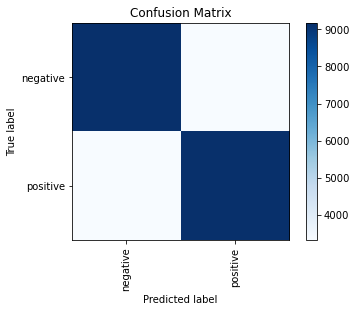

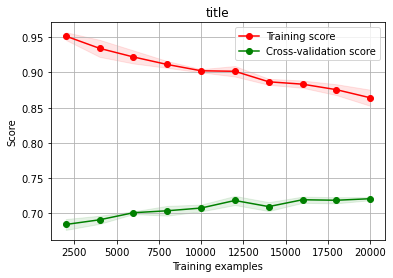

In [13]:
clf.eval_on_test([],False)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])